# 作業 : (Kaggle)房價預測

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Set data directory
dir_data = 'D:\Document\AI\Marathon100D\Assignment\Day_020\data'

# Set the full data file name
f_app_train = os.path.join(dir_data, 'house_train.csv.gz')

# Read compressed CSV into data frame
df_train = pd.read_csv(f_app_train)
print(df_train.shape)

# Extract target data from training data frame and convert it to natural logarithm value
train_Y = np.log1p(df_train['SalePrice'])

# Drop primary key and target column from the training data frame
df = df_train.drop(['Id', 'SalePrice'] , axis=1)

# Show top few rows
df.head()

(1460, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
# Initialize an empty array to store columns names
num_features = []

# For all data type and columns
for dtype, feature in zip(df.dtypes, df.columns):
    
    # If data type is float or integer
    if dtype == 'float64' or dtype == 'int64':
        
        # Add the column name to the array
        num_features.append(feature)

# Print the content of the array
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [5]:
# 削減文字型欄位, 只剩數值型欄位
# Extract the data frame by selecting the columns specified in the array
df = df[num_features]

# Fill up the empty data with -1
df = df.fillna(-1)

# Declare a Minmax scaler
MMEncoder = MinMaxScaler()

# Getting row count of data frame
train_num = train_Y.shape[0]

# Show top few rows of the data frame
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

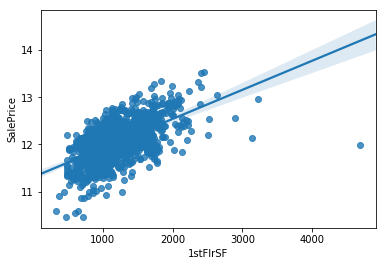

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.846643681071632

In [7]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt

# Plot data and a linear regression model fit using a column value and the target data
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)

# Show plot
plt.show()

# 做線性迴歸, 觀察分數
# Transform the data frame with the MinMax scaler ( fit and transform )
train_X = MMEncoder.fit_transform(df)

# Declare a linear regression model
estimator = LinearRegression()

# Get average cross value score
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

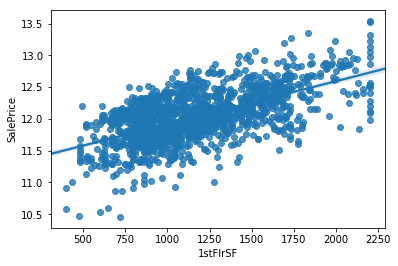

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8836894979073172

In [10]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
"""
Your Code Here
"""
# Clip to limit data range
df['1stFlrSF'] = df['1stFlrSF'].clip(400, 2200)

# Plot data and a linear regression model fit using a column value and the target data
sns.regplot(x = df['1stFlrSF'], y=train_Y)

# Show plot
plt.show()

# 做線性迴歸, 觀察分數
# Transform the data frame with the MinMax scaler ( fit and transform )
train_X = MMEncoder.fit_transform(df)

# Declare a linear regression model
estimator = LinearRegression()

# Get average cross value score
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# You should observe the average cross value based on the clipped data frame is higher than the original data frame

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

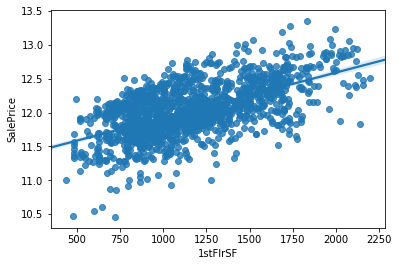

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8891534165254761

In [11]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
"""
Your Code Here
"""

# Create a index using the value range of a column
keep_indexs = (df['1stFlrSF']> 400) & (df['1stFlrSF']< 2200)

# Filter data frame using the index
df = df[keep_indexs]

# Filter data frame using the index
train_Y = train_Y[keep_indexs]

# Plot data and a linear regression model fit using a column value and the target data
sns.regplot(x = df['1stFlrSF'], y=train_Y)

# Show plot
plt.show()

# 做線性迴歸, 觀察分數
# Transform the data frame with the MinMax scaler ( fit and transform )
train_X = MMEncoder.fit_transform(df)

# Declare a linear regression model
estimator = LinearRegression()

# Get average cross value score
cross_val_score(estimator, train_X, train_Y, cv=5).mean()


The result of removing the outlier data is better than clipping the data, because clipping data actually force the outliers value to fall on the minimum value and maximum value, which inturns reduce the cross value score.